<a href="https://colab.research.google.com/github/Parkseojin2001/Deep-learning_with_Python/blob/main/chapter02_mathematical_building_blocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 2.1 신경망과의 첫 만남

In [1]:
from tensorflow.keras.datasets import mnist

In [2]:
# 케라스에서 MNIST 데이터셋 적재하기

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
len(train_labels)

60000

In [5]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
len(test_labels)

10000

In [8]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [9]:
from tensorflow import keras
from tensorflow.keras import layers

In [10]:
# 신경망 구조

model = keras.Sequential([
    layers.Dense(512, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

In [11]:
# 컴파일 단계

model.compile(optimizer = "rmsprop",
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])

In [12]:
# 이미지 데이터 준비
# 훈련 이미지 [0, 255] 사이의 값으로 형성되어있음

train_images = train_images.reshape((len(train_labels), 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((len(test_labels), 28 * 28))
test_images = test_images.astype("float32") / 255

In [13]:
# 모델 훈련하기

model.fit(train_images, train_labels, epochs = 5, batch_size = 128)

Epoch 1/5
469/469 [==============================] - 3s 6ms/step - loss: 0.2618 - accuracy: 0.9245
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.1048 - accuracy: 0.9696
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0695 - accuracy: 0.9798
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0502 - accuracy: 0.9853
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0380 - accuracy: 0.9889


In [14]:
# 모델을 사용하여 예측 만들기

test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 [==============================] - 0s 56ms/step


array([3.0709415e-08, 2.2273932e-09, 1.5266181e-05, 4.8963813e-04,
       4.7315069e-10, 1.2003895e-07, 7.1027711e-12, 9.9946028e-01,
       9.6893450e-07, 3.3736429e-05], dtype=float32)

In [15]:
predictions[0].argmax()

7

In [16]:
predictions[0][7]

0.9994603

In [17]:
test_labels[0]

7

In [18]:
 # 새로운 데이터에서 모델 평가하기

 test_loss, test_acc = model.evaluate(test_images, test_labels)
 print(f"테스트 정확도: {test_acc}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0586 - accuracy: 0.9816
테스트 정확도: 0.9815999865531921


## 2.2 신경망을 위한 데이터 표현

In [19]:
import numpy as np

In [20]:
# 스칼라(랭크-0 텐서)

x = np.array(12)
x

array(12)

In [21]:
x.ndim

0

In [22]:
# 벡터(랭크-1 텐서)

x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [23]:
x.ndim

1

In [24]:
# 행렬(랭크-2 텐서)

x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim

2

In [25]:
# 랭크-3 텐서

x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36,2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim

3

In [26]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [27]:
train_images.ndim

3

In [28]:
train_images.shape

(60000, 28, 28)

In [29]:
train_images.dtype

dtype('uint8')

In [30]:
import matplotlib.pyplot as plt

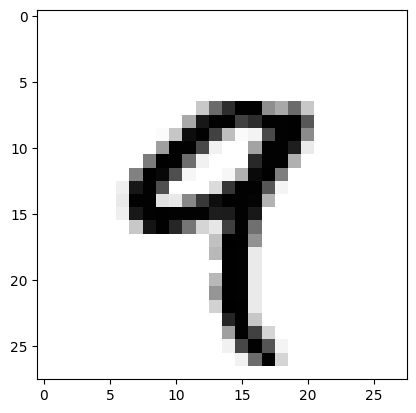

In [31]:
# 다섯 번째 이미지 출력하기

digit = train_images[4]
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()

In [32]:
train_labels[4]

9

In [33]:
# 슬라이싱

my_slice = train_images[10: 100]

In [34]:
my_slice.shape

(90, 28, 28)

In [35]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [36]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [37]:
# 14x14 픽셀을 선택
my_slice = train_images[:, 14:, 14:]

In [38]:
# 음수 인덱스 사용 - 정중앙에 위치한 14X14 픽셀
my_slice = train_images[:, 7: -7, 7:-7]

In [39]:
batch = train_images[:128]

In [40]:
batch = train_images[128:256]

In [41]:
n = 3
batch = train_images[128 * n : 128 * (n + 1)]

## 2.5 첫 번째 예제 다시 살펴보기


In [44]:
import tensorflow as tf

In [42]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

### 단순한 Dense 클래스

In [45]:
class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation

        w_shape = (input_size, output_size)
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
        self.W = tf.Variable(w_initial_value)

        b_shape = (output_size,)
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)

    def __call__(self, inputs):
        return self.activation(tf.matmul(inputs, self.W) + self.b)

    @property
    def weights(self):
        return [self.W, self.b]

### 단순한 Sequential 클래스

In [46]:
class NaiveSequential:
		def __init__(self, layers):
				self.layers = layers

		def __call__(self, inputs):
				x = inputs
				for layer in self.layers:
						x = layer(x)
				return x

		@property
		def weights(self):
				weights = []
				for layer in self.layers:
						weights += layer.weights
				return weights

In [47]:
model = NaiveSequential([
    NaiveDense(input_size=28 * 28, output_size=512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])
assert len(model.weights) == 4

### 배치 제너레이터

In [48]:
import math

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)

    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels

### 훈련 스텝 실행하기

In [49]:
def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(
            labels_batch, predictions)
        average_loss = tf.reduce_mean(per_sample_losses)
    gradients = tape.gradient(average_loss, model.weights)
    update_weights(gradients, model.weights)
    return average_loss

In [50]:
learning_rate = 1e-3

def update_weights(gradients, weights):
    for g, w in zip(gradients, weights):
        w.assign_sub(g * learning_rate)

In [51]:
from tensorflow.keras import optimizers

optimizer = optimizers.SGD(learning_rate=1e-3)

def update_weights(gradients, weights):
    optimizer.apply_gradients(zip(gradients, weights))

### 전체 훈련 루프

In [52]:
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print(f"에포크 {epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter % 100 == 0:
                print(f"{batch_counter}번째 배치 손실: {loss:.2f}")

In [53]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

fit(model, train_images, train_labels, epochs=10, batch_size=128)

에포크 0
0번째 배치 손실: 6.32
100번째 배치 손실: 2.28
200번째 배치 손실: 2.27
300번째 배치 손실: 2.13
400번째 배치 손실: 2.24
에포크 1
0번째 배치 손실: 1.95
100번째 배치 손실: 1.91
200번째 배치 손실: 1.88
300번째 배치 손실: 1.76
400번째 배치 손실: 1.85
에포크 2
0번째 배치 손실: 1.62
100번째 배치 손실: 1.61
200번째 배치 손실: 1.55
300번째 배치 손실: 1.46
400번째 배치 손실: 1.53
에포크 3
0번째 배치 손실: 1.36
100번째 배치 손실: 1.37
200번째 배치 손실: 1.28
300번째 배치 손실: 1.24
400번째 배치 손실: 1.30
에포크 4
0번째 배치 손실: 1.16
100번째 배치 손실: 1.18
200번째 배치 손실: 1.08
300번째 배치 손실: 1.08
400번째 배치 손실: 1.13
에포크 5
0번째 배치 손실: 1.01
100번째 배치 손실: 1.04
200번째 배치 손실: 0.93
300번째 배치 손실: 0.96
400번째 배치 손실: 1.01
에포크 6
0번째 배치 손실: 0.90
100번째 배치 손실: 0.93
200번째 배치 손실: 0.82
300번째 배치 손실: 0.86
400번째 배치 손실: 0.91
에포크 7
0번째 배치 손실: 0.82
100번째 배치 손실: 0.84
200번째 배치 손실: 0.74
300번째 배치 손실: 0.79
400번째 배치 손실: 0.85
에포크 8
0번째 배치 손실: 0.75
100번째 배치 손실: 0.78
200번째 배치 손실: 0.68
300번째 배치 손실: 0.74
400번째 배치 손실: 0.79
에포크 9
0번째 배치 손실: 0.70
100번째 배치 손실: 0.72
200번째 배치 손실: 0.63
300번째 배치 손실: 0.69
400번째 배치 손실: 0.75


In [54]:
predictions = model(test_images)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print(f"정확도: {matches.mean():.2f}")

정확도: 0.81
